<a href="https://colab.research.google.com/github/Radhika14soni/ML-Algo-from-scratch/blob/master/LinearRegression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


In [195]:
class LinearRegression:
    def __init__(self,lr=0.001,iters=1000,):
      self.iters = iters
      self.lr = lr
      self.weights = None
      self.bias = None

    def fit(self,train_x,train_y):

        n_samples,n_features =train_x.shape 
        self.weights=np.zeros(n_features)
        self.bias=0

        for i in range(self.iters):
               yhat = np.dot(train_x,self.weights) + self.bias # here we get one value for each sample 
      
               dw = (1/n_samples) * np.dot(train_x.T, (yhat - train_y)) # dw = derivative of w, here we want to get one value for each feature vector so we do x.T 
               db = (1/n_samples) * np.sum(yhat - train_y) # db = derivative of b

               self.weights -= self.lr * dw 
               self.bias -= self.lr * db
        #plt.plot(self.weights,yhat)
        #plt.show()
       
    def predict(self,test_x):
     prediction = np.dot(test_x,self.weights) + self.bias
     return prediction


    def mse(self,y_true,y_predict):
     self.n_samples=y_true.shape[0]
     return (1/self.n_samples)* (np.sum((y_true - y_predict)**2)) 
    

In [199]:
X,y = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=4)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)





'''
figure = plt.figure(figsize=(10,10))
plt.scatter(X,y,color='b',marker='o',s=30)
plt.show()
'''

"\nfigure = plt.figure(figsize=(10,10))\nplt.scatter(X,y,color='b',marker='o',s=30)\nplt.show()\n"

In [208]:

model = LinearRegression(lr=0.1)
model.fit(X_train,y_train)

predict = model.predict(X_test)
#print(X_test)
model.mse(y_test,predict)

305.77413162286416

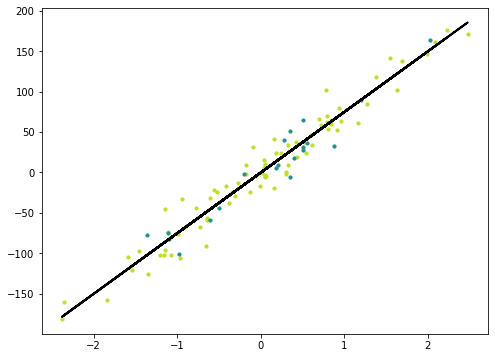

In [209]:
y_pred_line  = model.predict(X)

cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line , color='black', linewidth=2, label="Prediction")
plt.show()